## 20.1 An Example of a Linear Relationship

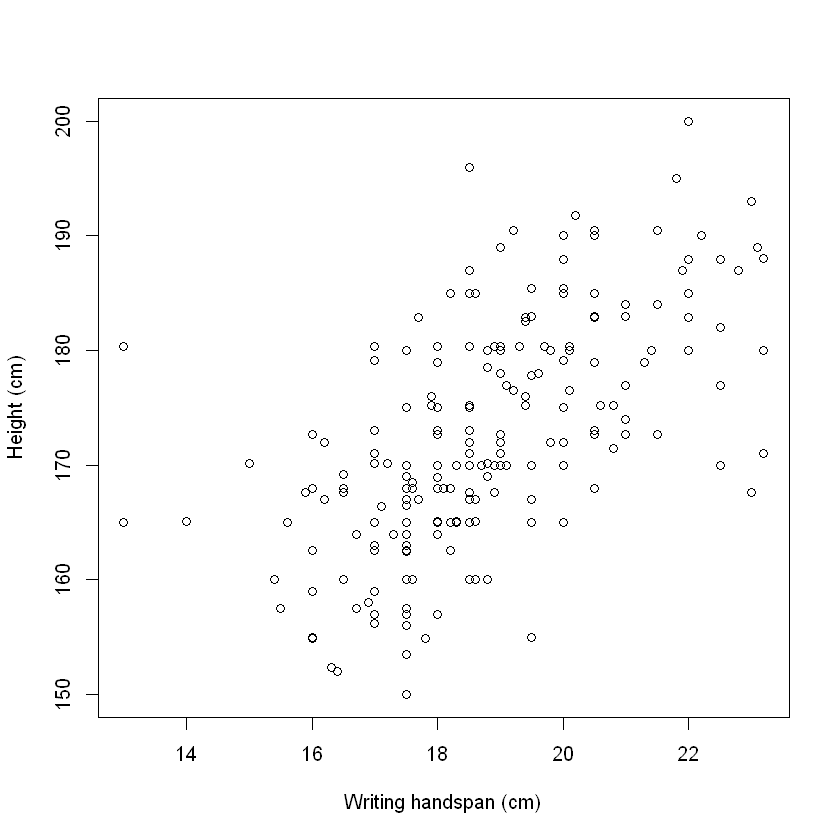

In [2]:
library(MASS)
plot(survey$Height~survey$Wr.Hnd,xlab="Writing handspan (cm)", ylab="Height (cm)")

In [3]:
cor(survey$Wr.Hnd,survey$Height,use="complete.obs")

[1] 0.6009909

Though there are 237 records in the data frame, the plot doesn’t
actually show 237 points. This is because there are missing observations
(coded NA; see Section 6.1.3). By default, R removes any “incomplete” pairs
when producing a plot like this. To find out how many offending observations have been deleted, you can use the short-form logical operator 

In [4]:
incomplete.obs <- which(is.na(survey$Height)|is.na(survey$Wr.Hnd))
length(incomplete.obs)

[1] 29

## 20.2 General Concepts
### 20.2.3 Fitting Linear Models with lm

In [5]:
survfit <- lm(Height~Wr.Hnd,data=survey)
survfit


Call:
lm(formula = Height ~ Wr.Hnd, data = survey)

Coefficients:
(Intercept)       Wr.Hnd  
    113.954        3.117  


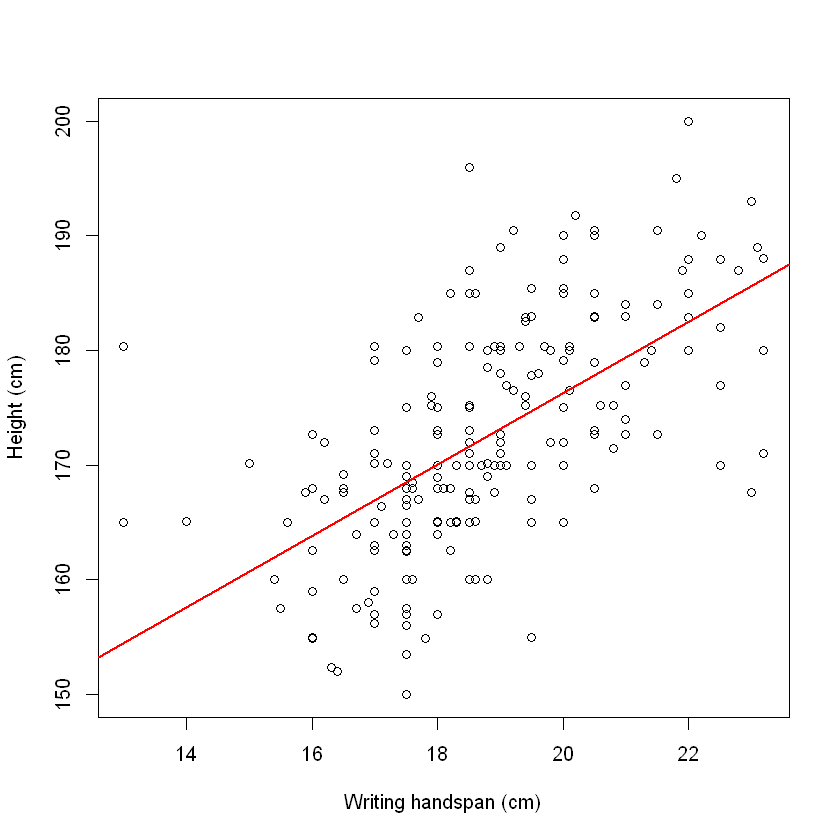

In [8]:
plot(survey$Height~survey$Wr.Hnd,xlab="Writing handspan (cm)", ylab="Height (cm)")
abline(survfit,lwd=2, col = "red")

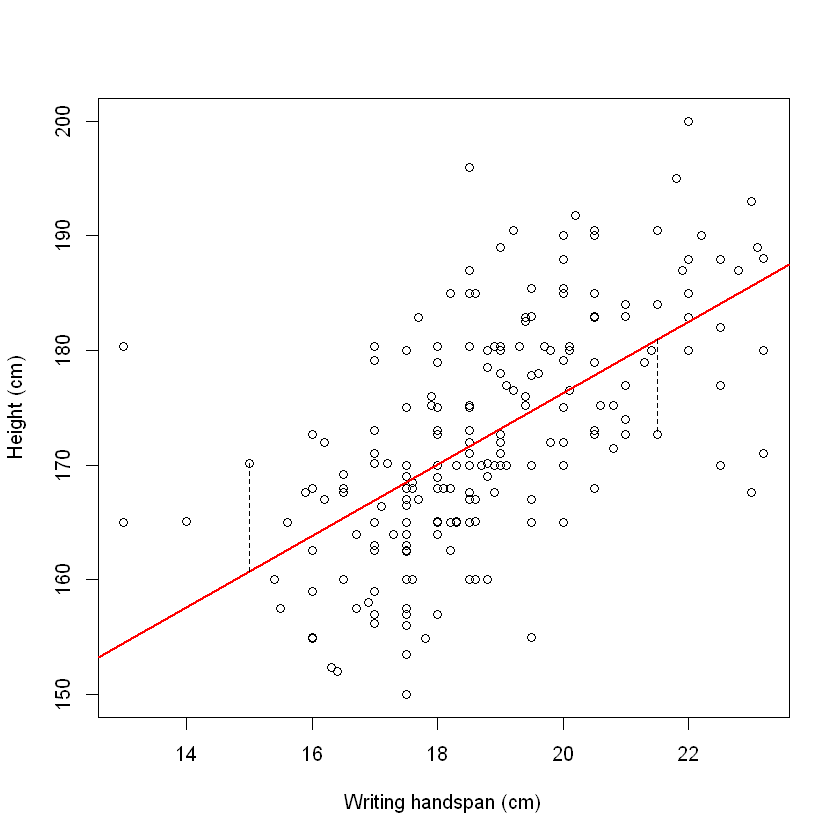

In [13]:
mycoefs <- coef(survfit)
beta0.hat <- mycoefs[1]
beta1.hat <- mycoefs[2]
obsA <- c(survey$Wr.Hnd[197],survey$Height[197])
obsB <- c(survey$Wr.Hnd[154],survey$Height[154])
plot.new()
plot(survey$Height~survey$Wr.Hnd,xlab="Writing handspan (cm)", ylab="Height (cm)")
abline(survfit,lwd=2, col = "red")
segments(x0=c(obsA[1],obsB[1]),y0=beta0.hat+beta1.hat*c(obsA[1],obsB[1]), x1=c(obsA[1],obsB[1]),y1=c(obsA[2],obsB[2]),lty=2)


## 20.3 Statistical Inference

In [14]:
summary(survfit)


Call:
lm(formula = Height ~ Wr.Hnd, data = survey)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.7276  -5.0706  -0.8269   4.9473  25.8704 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 113.9536     5.4416   20.94   <2e-16 ***
Wr.Hnd        3.1166     0.2888   10.79   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.909 on 206 degrees of freedom
  (29 observations deleted due to missingness)
Multiple R-squared:  0.3612,	Adjusted R-squared:  0.3581 
F-statistic: 116.5 on 1 and 206 DF,  p-value: < 2.2e-16


### 20.3.2 Regression Coefficient Significance Tests

In [15]:
confint(survfit,level=0.95)

,2.5 %,97.5 %
(Intercept),103.225178,124.682069
Wr.Hnd,2.547273,3.685961


### 20.3.3 Coefficient of Determination

In [16]:
rho.xy <- cor(survey$Wr.Hnd,survey$Height,use="complete.obs")
rho.xy^2

[1] 0.3611901

## 20.4 Prediction


### Confidence interval for the mean response (CI) 
Where CIs are used to describe the variability of the mean response. The CI corresponds to a mean


Continuing with our example, let’s say you want to determine the mean
height for students with a handspan of 14.5 cm and for students with a
handspan of 24 cm. The point estimates themselves are easy—just plug the
desired x values into the regression equation (20.4)

In [17]:
as.numeric(beta0.hat+beta1.hat*14.5) # determine the mean height for students with a handspan of 14.5 cm

[1] 159.1446

In [19]:
as.numeric(beta0.hat+beta1.hat*24) #determine the mean height for students with a handspan of 24 cm


[1] 188.7524

#### Confidence Intervals for Mean Heights


In [21]:
xvals <- data.frame(Wr.Hnd=c(14.5,24))
xvals

Wr.Hnd
14.5
24.0


In [22]:
mypred.ci <- predict(survfit,newdata=xvals,interval="confidence",level=0.95)
mypred.ci

,fit,lwr,upr
1,159.1446,156.4956,161.7936
2,188.7524,185.5726,191.9323


### Prediction Intervals for Individual Observations


In [24]:
mypred.pi <- predict(survfit,newdata=xvals,interval="prediction",level=0.95)
mypred.pi

,fit,lwr,upr
1,159.1446,143.3286,174.9605
2,188.7524,172.8390,204.6659


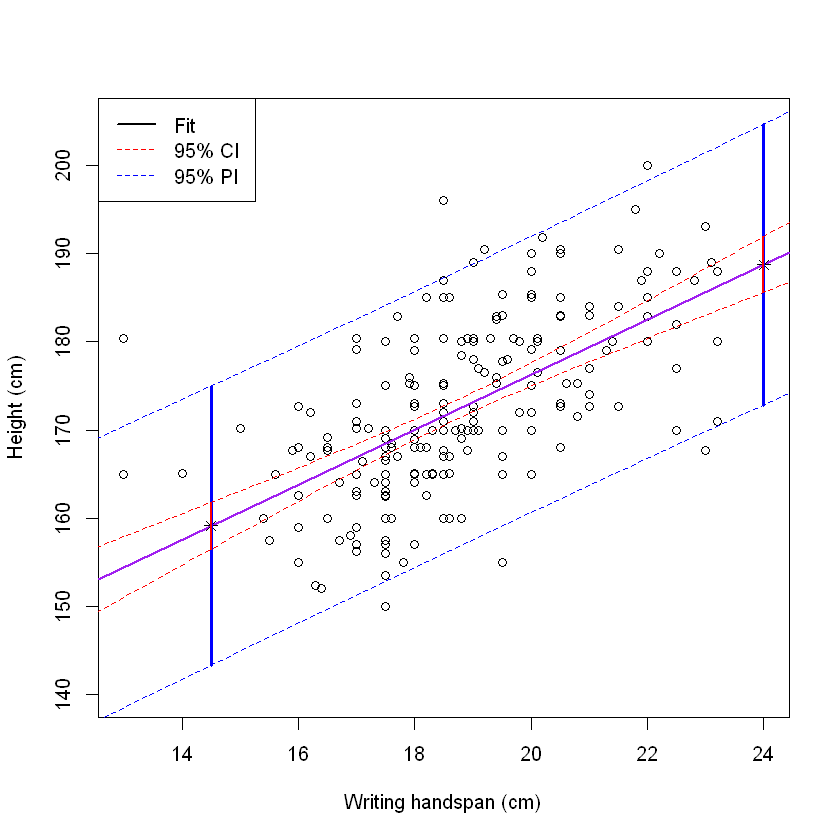

In [38]:
plot(survey$Height~survey$Wr.Hnd,xlim=c(13,24),ylim=c(140,205), xlab="Writing handspan (cm)",ylab="Height (cm)")
abline(survfit, lwd = 2, col = "purple")

points(xvals[,1],mypred.ci[,1],pch=8)
segments(x0=c(14.5,24),y0=c(mypred.pi[1,2],mypred.pi[2,2]), x1=c(14.5,24),y1=c(mypred.pi[1,3],mypred.pi[2,3]),col="blue",lwd=3)
segments(x0=c(14.5,24),y0=c(mypred.ci[1,2],mypred.ci[2,2]), x1=c(14.5,24),y1=c(mypred.ci[1,3],mypred.ci[2,3]),lwd=2, col = "red")
xseq <- data.frame(Wr.Hnd=seq(12,25,length=100))

ci.band <- predict(survfit,newdata=xseq,interval="confidence",level=0.95)
pi.band <- predict(survfit,newdata=xseq,interval="prediction",level=0.95)

lines(xseq[,1],ci.band[,2],lty=2, col = "red")
lines(xseq[,1],ci.band[,3],lty=2, col = "red")
lines(xseq[,1],pi.band[,2],lty=2,col="blue")
lines(xseq[,1],pi.band[,3],lty=2,col="blue")
legend("topleft",legend=c("Fit","95% CI","95% PI"),lty=c(1,2,2), col=c("black","red","blue"),lwd=c(2,1,1))

## 20.5 Understanding Categorical Predictors

### 20.5.1 Binary Variables: k = 2

Now, suppose your predictor variable is categorical, with
only two possible levels (binary; k = 2) and observations coded either 0 or 1.
For this case, (20.1) still holds, but the interpretation of the model parameters, β0 and β1, isn’t really one of an “intercept” and a “slope” anymore. <br> <br>
Instead, it’s better to think of them as being something like two intercepts,
where β0 provides the baseline or reference value of the response when X = 0
and β1 represents the additive effect on the mean response if X = 1. In other
words, if X = 0, then Y = β0 + ǫ; if X = 1, then Y = β0 + β1 + ǫ. As usual,
estimation is in terms of finding the mean response yˆ ≡ E[Y |X = x] as per
Equation (20.2), so the equation becomes yˆ = βˆ0 + βˆ1x.

In [40]:
class(survey$Sex)
table(survey$Sex)

[1] "factor"


Female   Male 
   118    118 

In [45]:
means.sex = tapply(survey$Height, INDEX=survey$Sex, FUN=mean, na.rm=TRUE)
means.sex

ERROR while rich displaying an object: Error in dn[[2L]]: subscript out of bounds

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_markdown.numeric(obj)
9. repr_vector_generic(html_escape_names(obj), "%s. %s\n", "%s\n:   %s", 
 .     "**%s:** %s", "%s\n\n", item_uses_numbers = TRUE, escape_fun = html_escape)
10. html_escape_names(obj)
11. .escape_names(obj, "html")
12. colnames(obj)
ERROR while rich displaying an object: 

Female     Male 
165.6867 178.8260

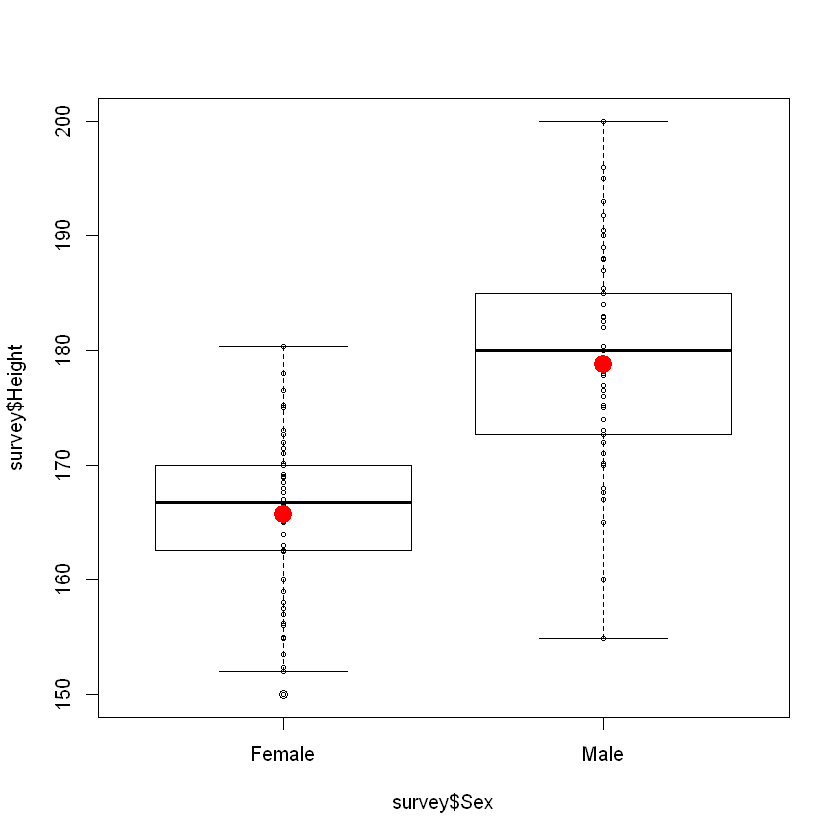

In [50]:
plot(survey$Height~survey$Sex)
points(survey$Height~as.numeric(survey$Sex),cex=0.5)
points(1:2,means.sex,pch=19,cex=2, col = "red")

### Linear Regression Model of Binary Variables

In [53]:
survfit2 <- lm(Height~Sex,data=survey)
summary(survfit2)


Call:
lm(formula = Height ~ Sex, data = survey)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.886  -5.667   1.174   4.358  21.174 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  165.687      0.730  226.98   <2e-16 ***
SexMale       13.139      1.022   12.85   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.372 on 206 degrees of freedom
  (29 observations deleted due to missingness)
Multiple R-squared:  0.4449,	Adjusted R-squared:  0.4422 
F-statistic: 165.1 on 1 and 206 DF,  p-value: < 2.2e-16


### Predictions from a Binary Categorical Variable

In [54]:
extra.obs <- factor(c("Female","Male","Male","Male","Female"))
extra.obs

[1] Female Male   Male   Male   Female
Levels: Female Male

In [56]:
predict(survfit2,newdata=data.frame(Sex=extra.obs),interval="confidence",level=0.9)

,fit,lwr,upr
1,165.6867,164.4806,166.8928
2,178.8260,177.6429,180.0092
3,178.8260,177.6429,180.0092
4,178.8260,177.6429,180.0092
5,165.6867,164.4806,166.8928


### 20.5.2 Multilevel Variables: k > 2

It’s common to work with data where the categorical predictor variables
have more than two levels so that (k > 2). These can also be referred to as
multilevel categorical variables. To deal with this more complicated situation
while retaining interpretability of your parameters, you must first dummy
code your predictor into k − 1 binary variables.

In [58]:
 is.factor(survey$Smoke)
table(survey$Smoke)
levels(survey$Smoke)

[1] TRUE


Heavy Never Occas Regul 
   11   189    19    17 

[1] "Heavy" "Never" "Occas" "Regul"

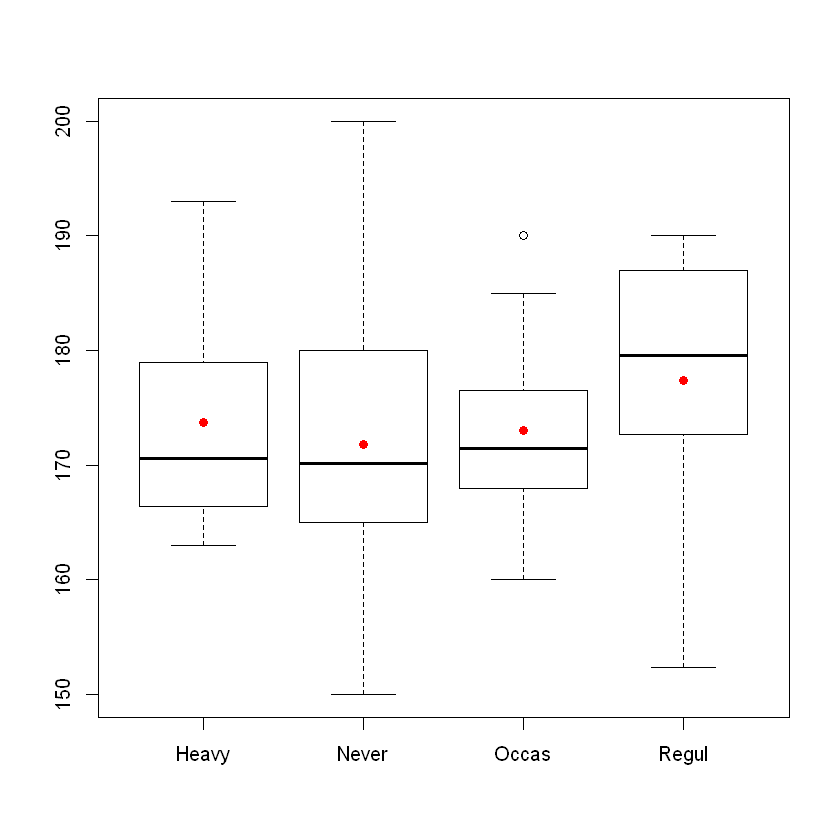

In [62]:
boxplot(Height~Smoke,data=survey)
points(1:4,tapply(survey$Height,survey$Smoke,mean,na.rm=TRUE),pch=19, col = "red")

In [64]:
survfit3 <- lm(Height~Smoke,data=survey)
summary(survfit3)


Call:
lm(formula = Height ~ Smoke, data = survey)

Residuals:
   Min     1Q Median     3Q    Max 
-25.02  -6.82  -1.64   8.18  28.18 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 173.7720     3.1028  56.005   <2e-16 ***
SmokeNever   -1.9520     3.1933  -0.611    0.542    
SmokeOccas   -0.7433     3.9553  -0.188    0.851    
SmokeRegul    3.6451     4.0625   0.897    0.371    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.812 on 205 degrees of freedom
  (28 observations deleted due to missingness)
Multiple R-squared:  0.02153,	Adjusted R-squared:  0.007214 
F-statistic: 1.504 on 3 and 205 DF,  p-value: 0.2147


### Predictions from a Multilevel Categorical Variable

In [65]:
one.of.each <- factor(levels(survey$Smoke))
one.of.each

[1] Heavy Never Occas Regul
Levels: Heavy Never Occas Regul

In [66]:
predict(survfit3,newdata=data.frame(Smoke=one.of.each), interval="confidence",level=0.95)

,fit,lwr,upr
1,173.7720,167.6545,179.8895
2,171.8200,170.3319,173.3081
3,173.0288,168.1924,177.8651
4,177.4171,172.2469,182.5874


### 20.5.4 Treating Categorical Variables as Numeric


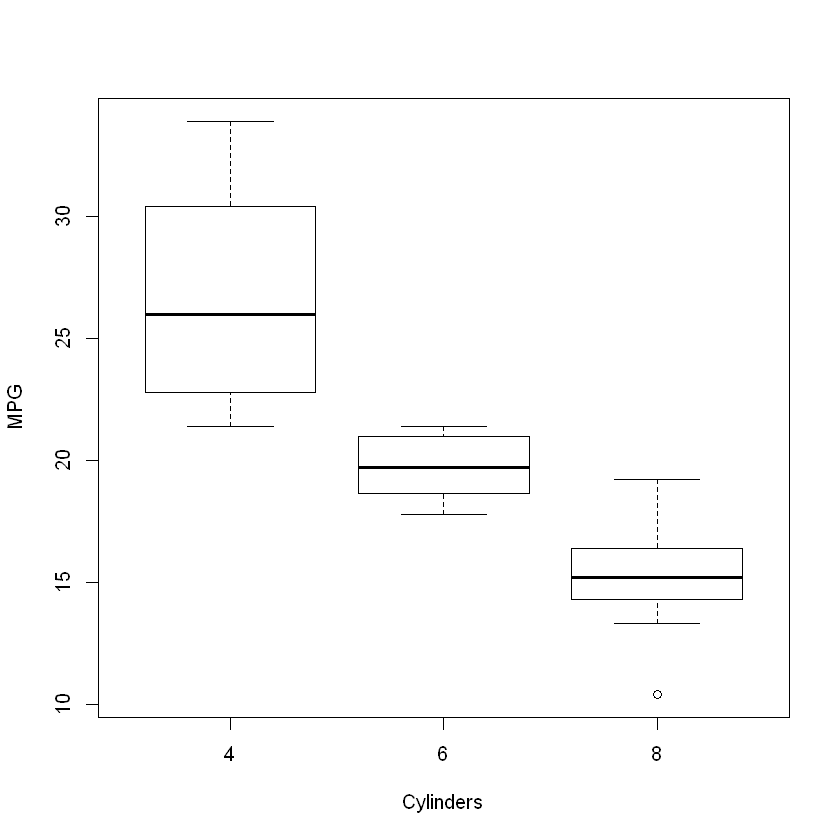

In [67]:
boxplot(mtcars$mpg~mtcars$cyl,xlab="Cylinders",ylab="MPG")

In [68]:
 carfit <- lm(mpg~cyl,data=mtcars)

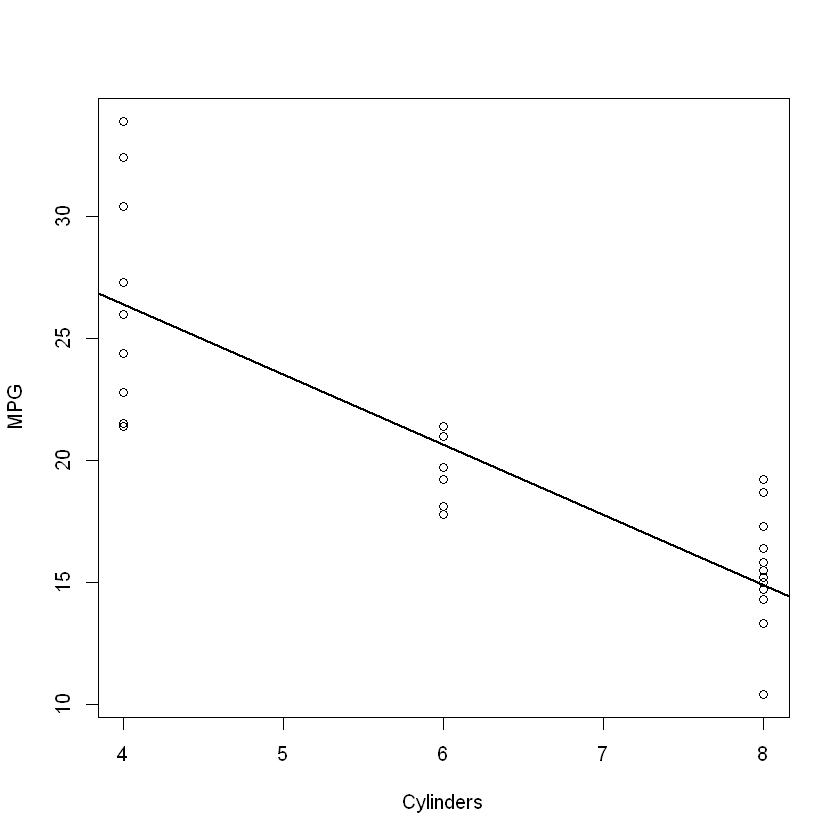

In [69]:
plot(mtcars$mpg~mtcars$cyl,xlab="Cylinders",ylab="MPG")
abline(carfit,lwd=2)

In [70]:
carfit <- lm(mpg~factor(cyl),data=mtcars)
carfit


Call:
lm(formula = mpg ~ factor(cyl), data = mtcars)

Coefficients:
 (Intercept)  factor(cyl)6  factor(cyl)8  
      26.664        -6.921       -11.564  


In [71]:
 summary(aov(Height~Smoke,data=survey))

             Df Sum Sq Mean Sq F value Pr(>F)
Smoke         3    434  144.78   1.504  0.215
Residuals   205  19736   96.27               
28 observations deleted due to missingness